In [1]:
# Looking at file name and extract information about the Class Label
# Create an env using requirements.txt file
# tested on python3.8.10
import pandas as pd
import glob
from collections import Counter

filenames = glob.glob("../input/Audio_*_Actors_01-24/Actor_*/*.wav")

In [2]:
emotions_id={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
label_counts = dict(Counter([x.split('/')[-1].split('-')[2] for x in filenames]))
label_counts = {emotions_id[k]:v for k,v in label_counts.items()}
label_counts

{'happy': 376,
 'calm': 376,
 'neutral': 188,
 'fearful': 376,
 'angry': 376,
 'sad': 376,
 'disgust': 192,
 'surprised': 192}

    Note: If we go about creating a classifier for all the 8 emotions we might have to look out for 
          class imballance for the 3 downsampled class (['neutral', 'disgust', 'surprised'])
          The way to take care of them would be:
          1. Not to look at Accuracy as a metric for validation/train
          2. We can go about Tree based algorithms (eg: XGBoost) where we can specify class weights for prediction neutrality.
          
          
          We can also drop those classes and train a classifier to only detect the balanced classes [happy, sad, fearful, angry, calm]

In [3]:
# Lets visualise how a single sound File looks like and its features
fid = filenames[200]
print(fid)

../input/Audio_Song_Actors_01-24/Actor_19/03-02-02-02-02-02-19.wav


In [4]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np

In [5]:
sf = soundfile.SoundFile(fid)
data = sf.read(dtype="float32")
sample_rate = sf.samplerate

In [6]:
sf

SoundFile('../input/Audio_Song_Actors_01-24/Actor_19/03-02-02-02-02-02-19.wav', mode='r', samplerate=48000, channels=1, format='WAV', subtype='PCM_16', endian='FILE')

In [7]:
data[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
duration = data.shape[0]/sample_rate
duration

4.8048125

In [9]:
sample_rate

48000

In [10]:
import IPython.display as ipd
ipd.Audio(fid)

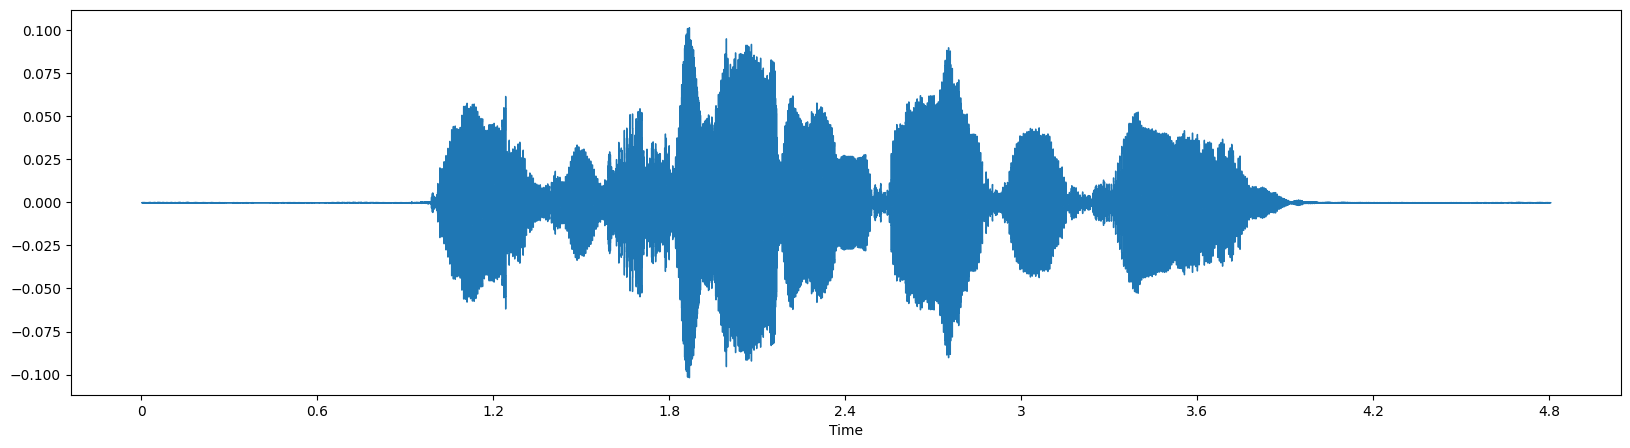

In [16]:
# Waveplot
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(20, 5))
librosa.display.waveshow(data, sr=sample_rate)

/var/folders/3n/x9kybq5j03l06pmf5rp2tn480000gn/T/ipykernel_77902/3567875964.py:5: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(x_stft, sr=sample_rate, x_axis='time', y_axis='hz', )


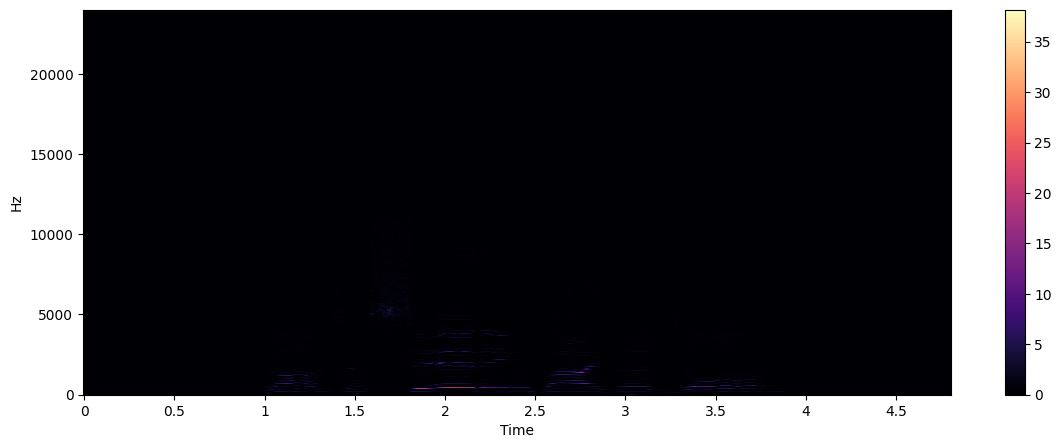

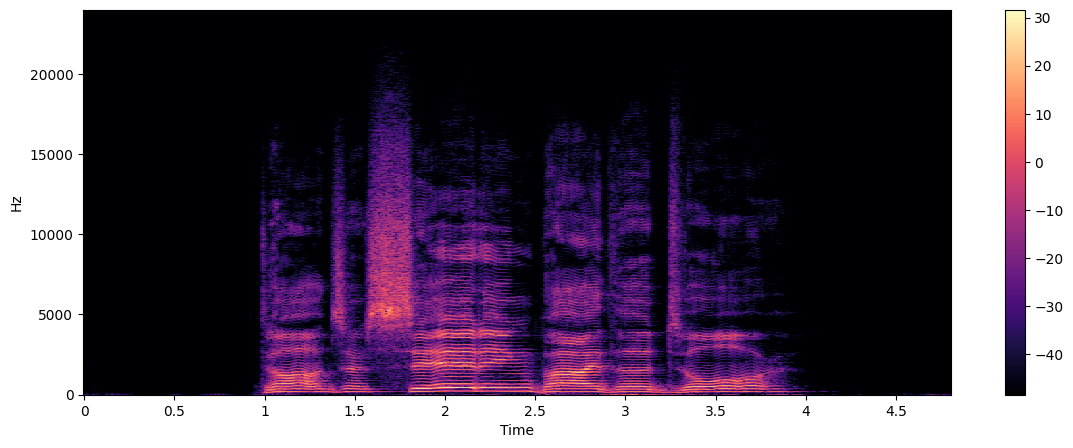

In [17]:
# Spectrogram
x_stft = librosa.stft(data)
x_db = librosa.amplitude_to_db(abs(x_stft))
plt.figure(figsize=(14, 5))
librosa.display.specshow(x_stft, sr=sample_rate, x_axis='time', y_axis='hz', ) 
plt.colorbar()

plt.figure(figsize=(14, 5))
librosa.display.specshow(x_db, sr=sample_rate, x_axis='time', y_axis='hz', ) 
plt.colorbar()

Shape: (12, 451)


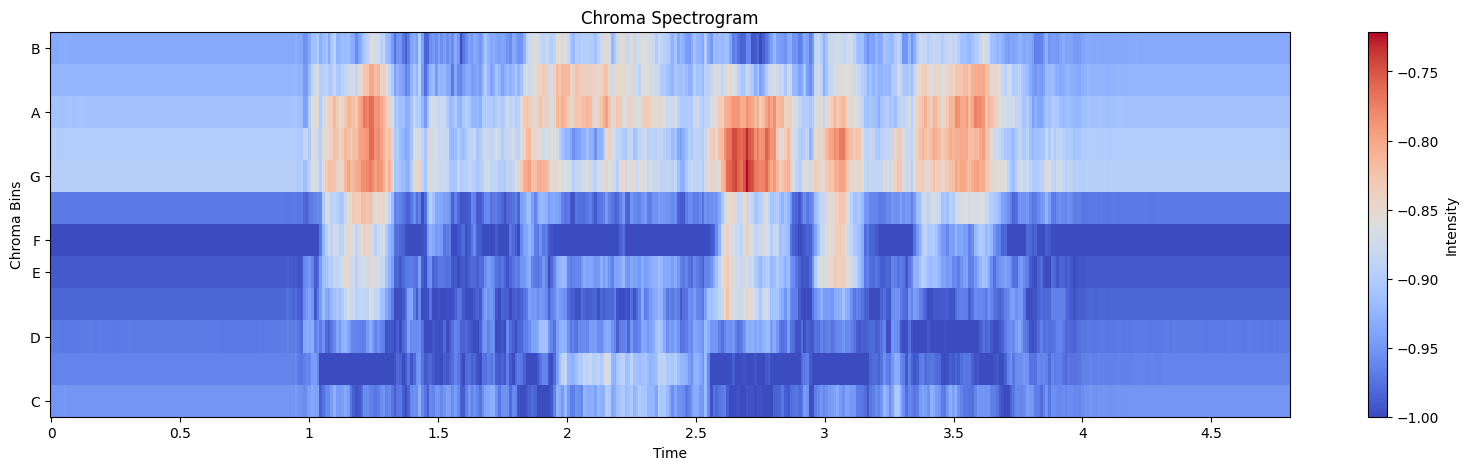

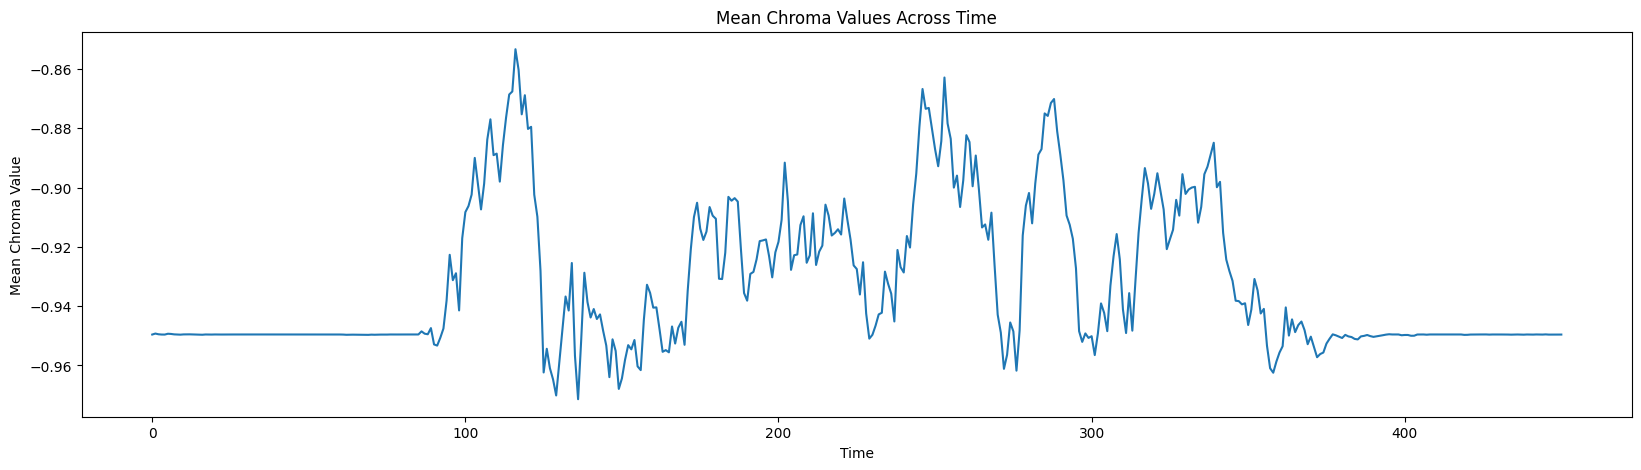

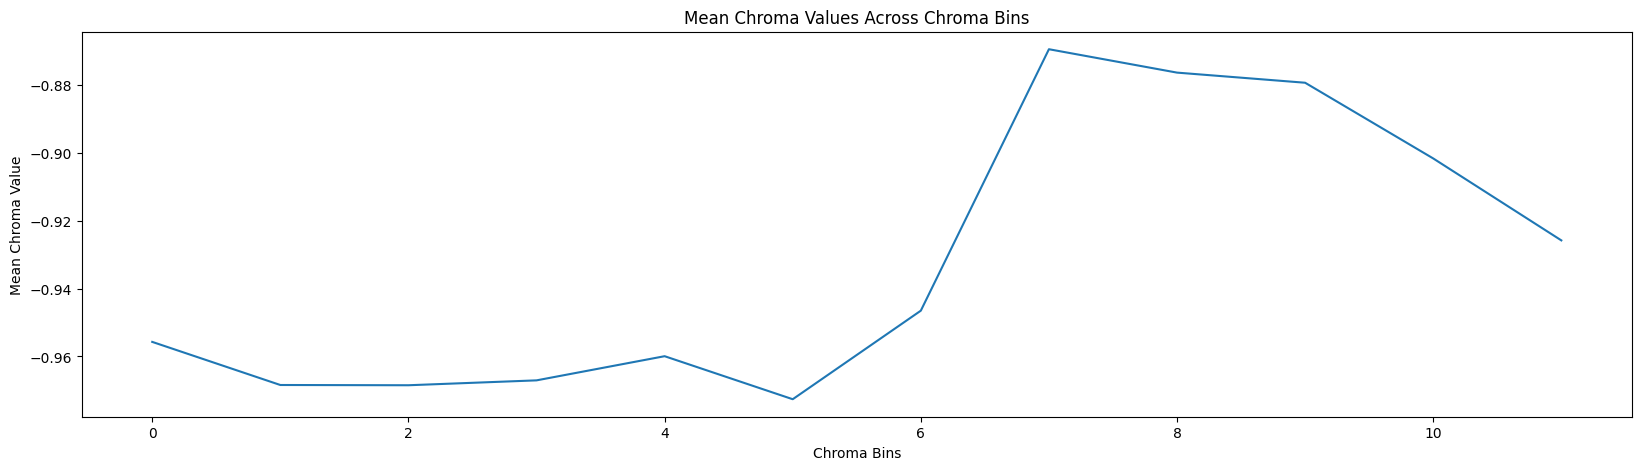

In [19]:
# Calculate STFT
x_stft = librosa.stft(data)

# Convert magnitude to decibel scale
S_db = librosa.amplitude_to_db(np.abs(x_stft), ref=np.max)

# Compute Chroma STFT (use standard n_chroma=12 unless required otherwise)
chroma = librosa.feature.chroma_stft(S=S_db, sr=sample_rate, n_chroma=12)

# Display the Chroma Spectrogram
print('Shape:', chroma.shape)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chroma, sr=sample_rate, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar(label='Intensity')
plt.title("Chroma Spectrogram")
plt.xlabel("Time")
plt.ylabel("Chroma Bins")
plt.show()

# Plot Mean Chroma Values (Across Time and Across Chroma Bins)
plt.figure(figsize=(20, 5))
plt.plot(np.mean(chroma, axis=0))  # Mean across chroma bins (time variation)
plt.title("Mean Chroma Values Across Time")
plt.xlabel("Time")
plt.ylabel("Mean Chroma Value")
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(np.mean(chroma, axis=1))  # Mean across time (chroma variation)
plt.title("Mean Chroma Values Across Chroma Bins")
plt.xlabel("Chroma Bins")
plt.ylabel("Mean Chroma Value")
plt.show()

shape: (13, 451)


/var/folders/3n/x9kybq5j03l06pmf5rp2tn480000gn/T/ipykernel_77902/2036958425.py:6: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(chroma, sr=sample_rate, x_axis='time')


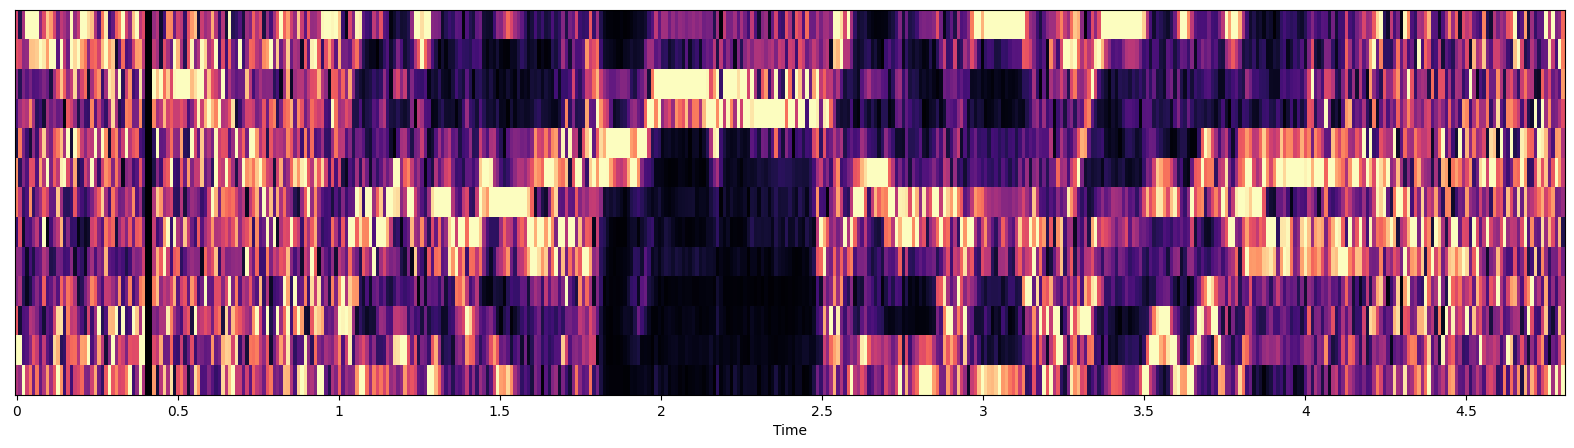

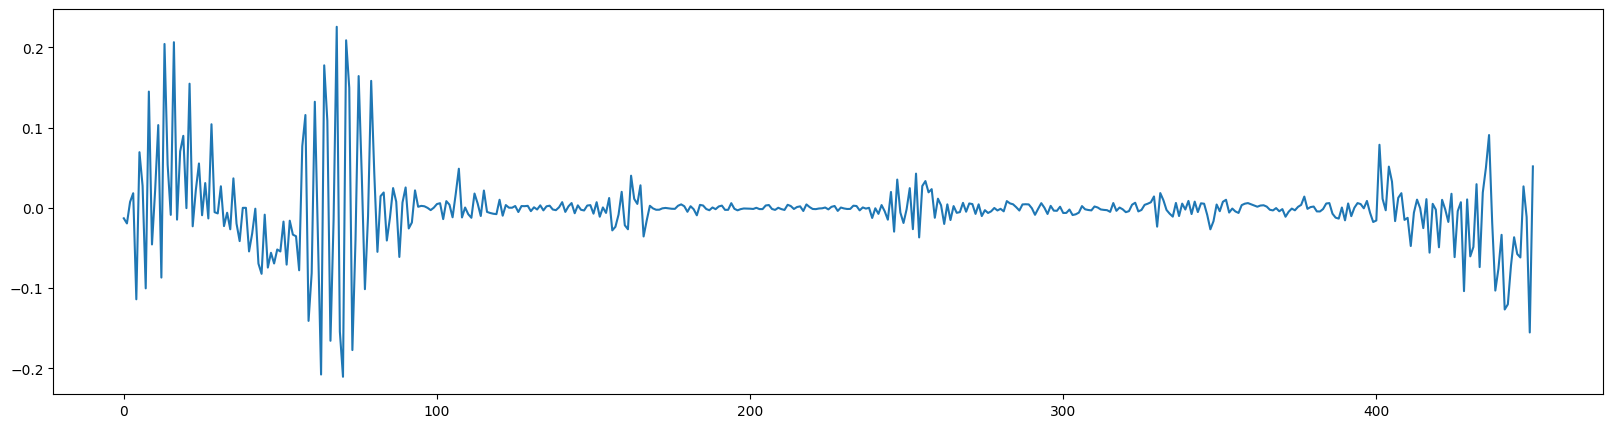

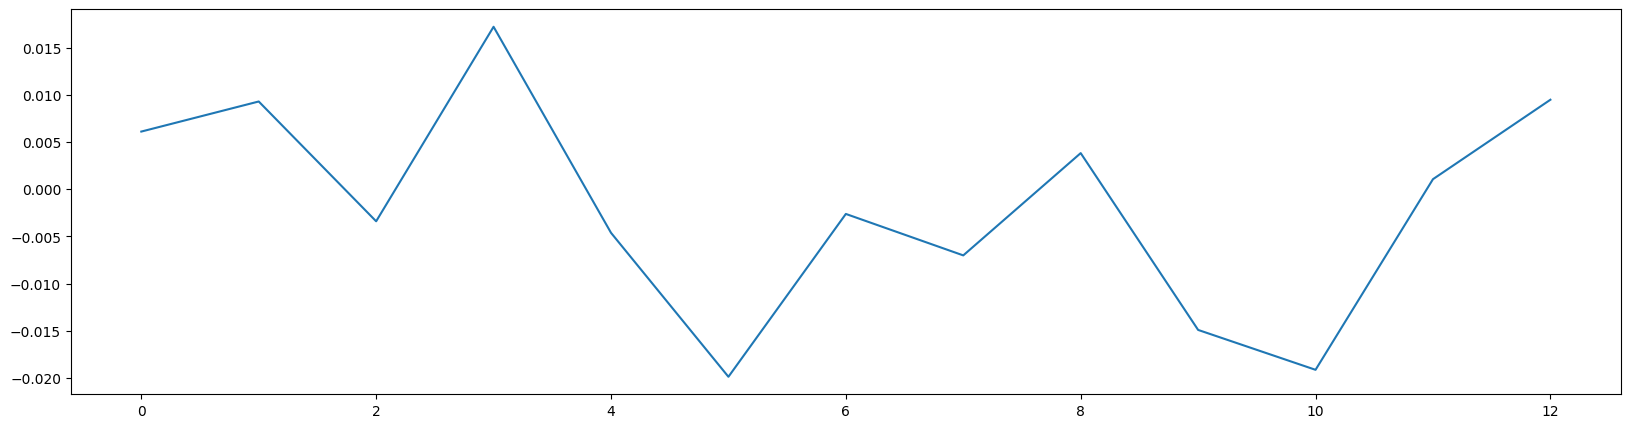

In [20]:
#chroma sftt (chroma spectogram)
x_stft = librosa.stft(data)
chroma = librosa.feature.chroma_stft(S=x_stft, sr=sample_rate, n_chroma=13)
print('shape:' ,chroma.shape)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chroma, sr=sample_rate, x_axis='time')


plt.figure(figsize=(20, 5))
plt.plot(np.mean(np.real(chroma), axis=0))

plt.figure(figsize=(20, 5))
plt.plot(np.mean(np.real(chroma), axis=1))

Shape: (13, 451)


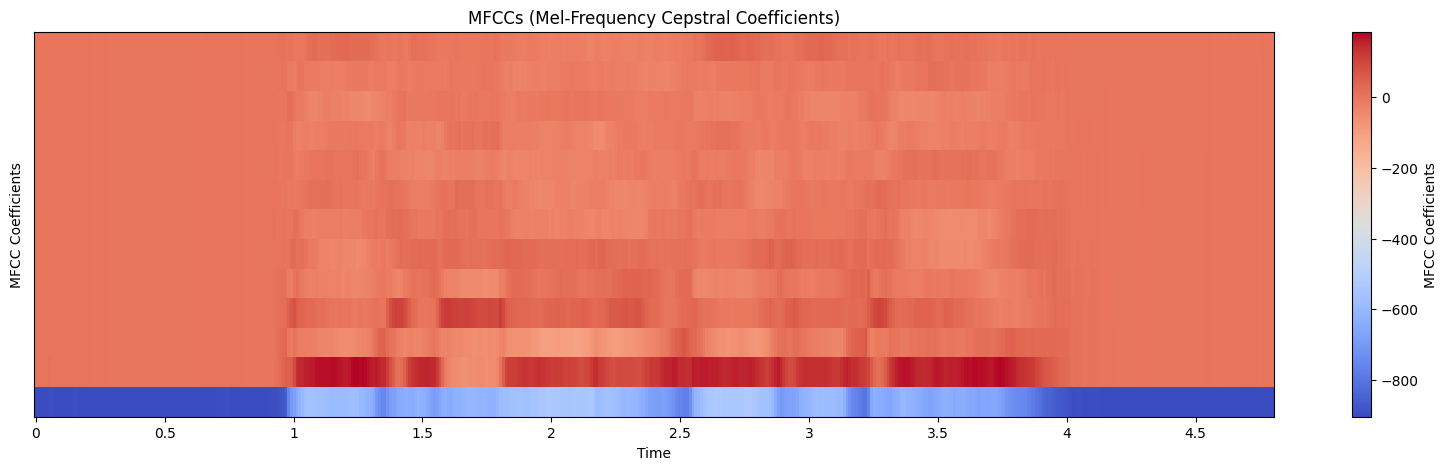

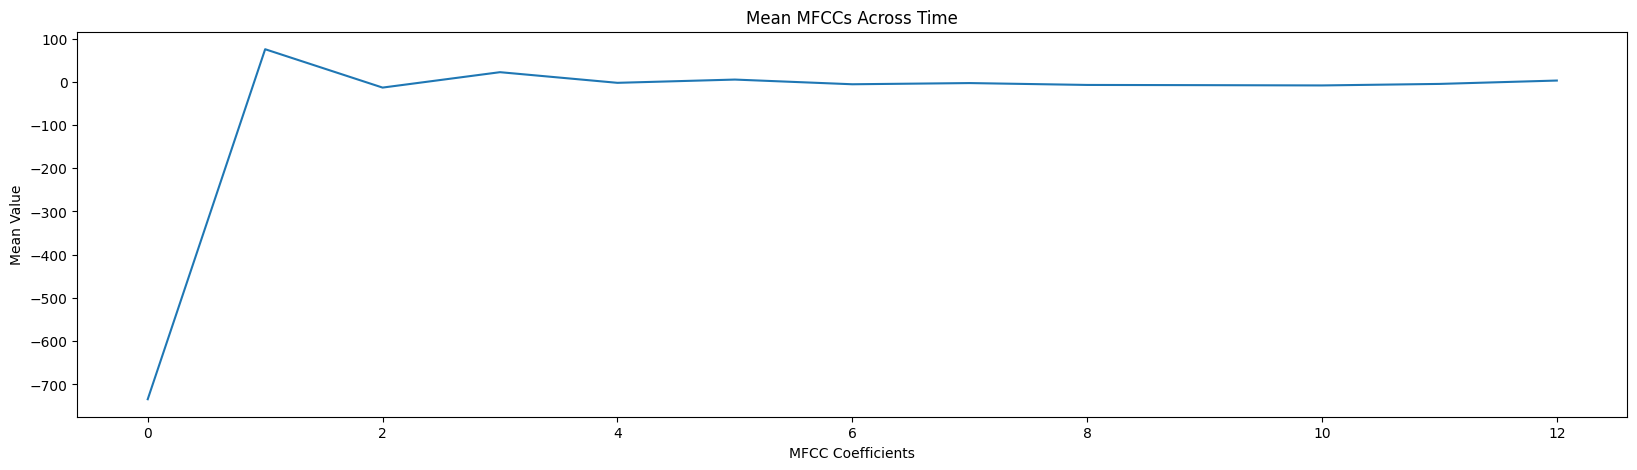

In [22]:
# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=128)

# Convert to log scale (dB)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Compute MFCCs
mfccs = librosa.feature.mfcc(S=mel_spectrogram_db, sr=sample_rate, n_mfcc=13)

# Print MFCC shape
print('Shape:', mfccs.shape)

# Visualize MFCCs
plt.figure(figsize=(20, 5))
librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate, cmap='coolwarm')
plt.colorbar(label='MFCC Coefficients')
plt.title("MFCCs (Mel-Frequency Cepstral Coefficients)")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()

# Plot Mean MFCCs Across Time
plt.figure(figsize=(20, 5))
plt.plot(np.mean(mfccs, axis=1))
plt.title("Mean MFCCs Across Time")
plt.xlabel("MFCC Coefficients")
plt.ylabel("Mean Value")
plt.show()


Number of Zero Crossing in interval:  8


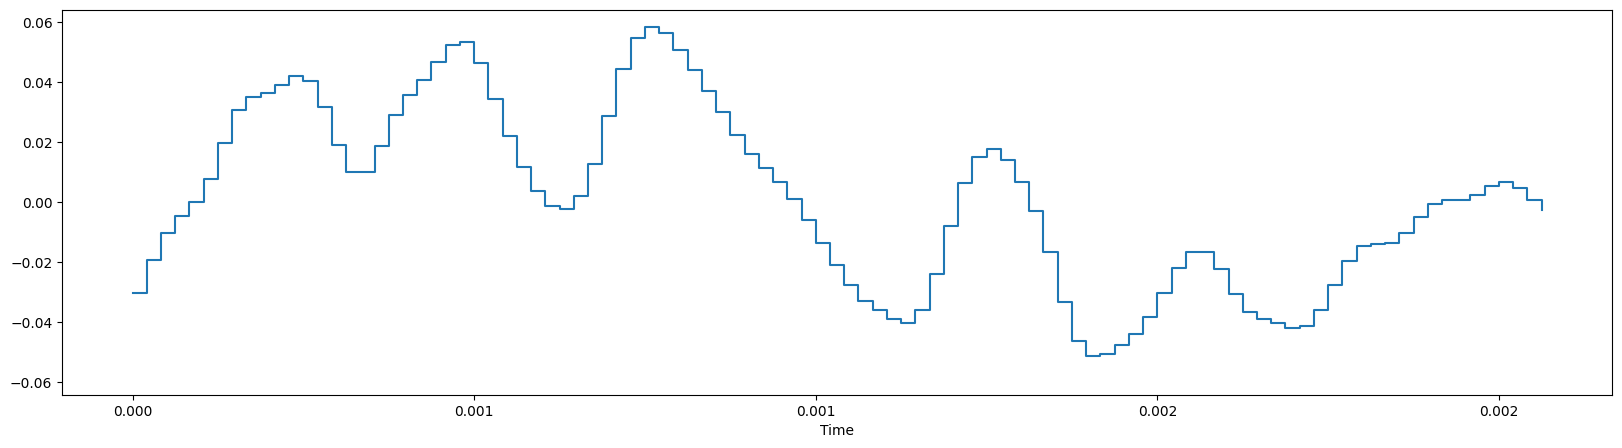

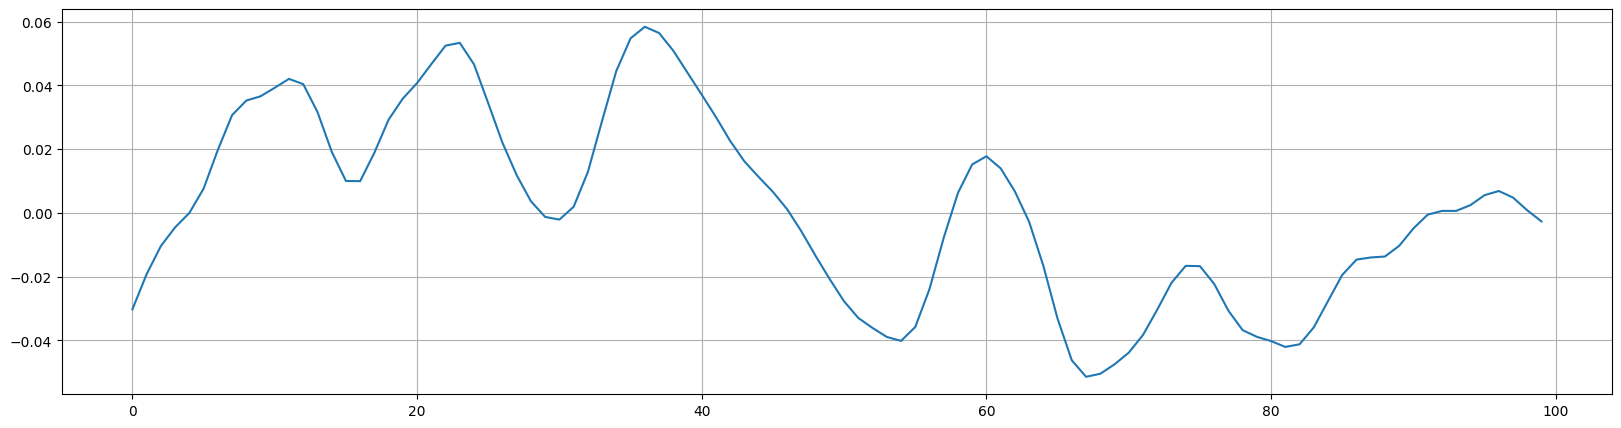

In [24]:
# Zero Crossings
plt.figure(figsize=(20, 5))
librosa.display.waveshow(data[100000:100100], sr=sample_rate)
plt.figure(figsize=(20, 5))
plt.plot(data[100000:100100])
plt.grid()
zero_crossings = librosa.zero_crossings(data[100000:100100], pad=False)
print('Number of Zero Crossing in interval: ', sum(zero_crossings))

In [25]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [44]:
def extract_feature(file_name, mfcc=True, chroma=True, mel=True, zero_crossing=True):
    '''
    Function to extract features from a single sound file. It can derive 4 features, and can be extended to extract
    more features in the same way.
    
    Parameters
    file_name (str): File name to extract the features for.
    mfcc (bool): If the MFCC (Mel-Frequency Cepstral Coefficients) feature needs 
                    to be calculated or not. By default it's True.
    Similarly chroma, mel and zero_crossing features, all are turned on by default.
    
    return (list): [all the feature values concatenated to form a single list.]
    '''
    
    with soundfile.SoundFile(file_name) as sound_file:
        # Open the soundfile
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        # Get the sample rate of the sound
        result = np.array([])
        if mfcc:
            # Calculate Mel-Frequency Cepstral Coefficients
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            # Calculate chroma stft (chroma spectrogram)
            stft = np.abs(librosa.stft(X))
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate, n_chroma=24).T, axis=0)
            result = np.hstack((result, chroma))
        if mel:
            # Calculate mel spectrogram
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)  # Added y= parameter
            result = np.hstack((result, mel))
        if zero_crossing:
            # Calculate the number of zero crossings
            zc = sum(librosa.zero_crossings(X, pad=False))
            result = np.hstack((result, zc))
    return result

In [45]:
from collections import Counter

In [46]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
reverse_emotions = {v:k for k,v in emotions.items()}

# observed_emotions=['calm', 'happy', 'fearful', 'disgust'] // 82
observed_emotions=list(emotions.values())


filenames = glob.glob("../input/Audio_*_Actors_01-24/Actor_*/*.wav")

id_counts = dict(Counter([x.split('/')[-1].split('-')[2] for x in filenames]))
label_counts = {emotions[k]:v for k,v in id_counts.items()}

In [47]:
def load_data():
    x,y=[],[]
    for file in filenames:
        try:
            file_name=os.path.basename(file)
            emotion=emotions[file_name.split("-")[2]]
            if emotion not in observed_emotions:
                continue
            feature=extract_feature(file)
            x.append(feature)
            y.append(emotion)
        except Exception as e:
            print(e, file)
    return [np.array(x), y]

In [48]:
data_x, data_y = load_data()

all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s) ../input/Audio_Song_Actors_01-24/Actor_24/03-02-01-01-01-01-24.wav
all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s) ../input/Audio_Speech_Actors_01-24/Actor_20/03-01-06-01-01-02-20.wav
all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s) ../input/Audio_Speech_Actors_01-24/Actor_20/03-01-03-01-02-01-20.wav
all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s) ../input/Audio_Speech_Actors_01-24/Actor_05/03-01-02-01-02-02-05.wav
all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension

In [49]:
#Keras-tf model MLP with Dense

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=0.001)

In [50]:
reverse_emotions

{'neutral': '01',
 'calm': '02',
 'happy': '03',
 'sad': '04',
 'angry': '05',
 'fearful': '06',
 'disgust': '07',
 'surprised': '08'}

In [51]:
# Data
x_train,x_test,y_train,y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=9)

y_train = to_categorical([int(reverse_emotions[x])-1 for x in y_train])
y_test = to_categorical([int(reverse_emotions[x])-1 for x in y_test])

# Configuration options
feature_vector_length = x_train.shape[1]
num_classes = len(observed_emotions)

input_shape = (feature_vector_length,)

In [52]:
# INPUT_VECTOR(193) : IN(120) : H(80: 50: 30: 20): OP(8)

In [ ]:
# Create the model
np.random.seed(1) # repr


model = Sequential()
model.add(Dense(120, input_shape=input_shape, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop_cb = EarlyStopping(monitor='accuracy', patience=10)

history = model.fit(x_train, y_train, epochs=1500, batch_size=4*16, verbose=1, shuffle=True, validation_split=0.2, callbacks=[early_stop_cb], use_multiprocessing=True, workers=3, )

# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - accuracy: {test_results[1]}%')

y_pred = model.predict(x_test)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

In [ ]:
model.save("../output/keras/keras_model.h5")

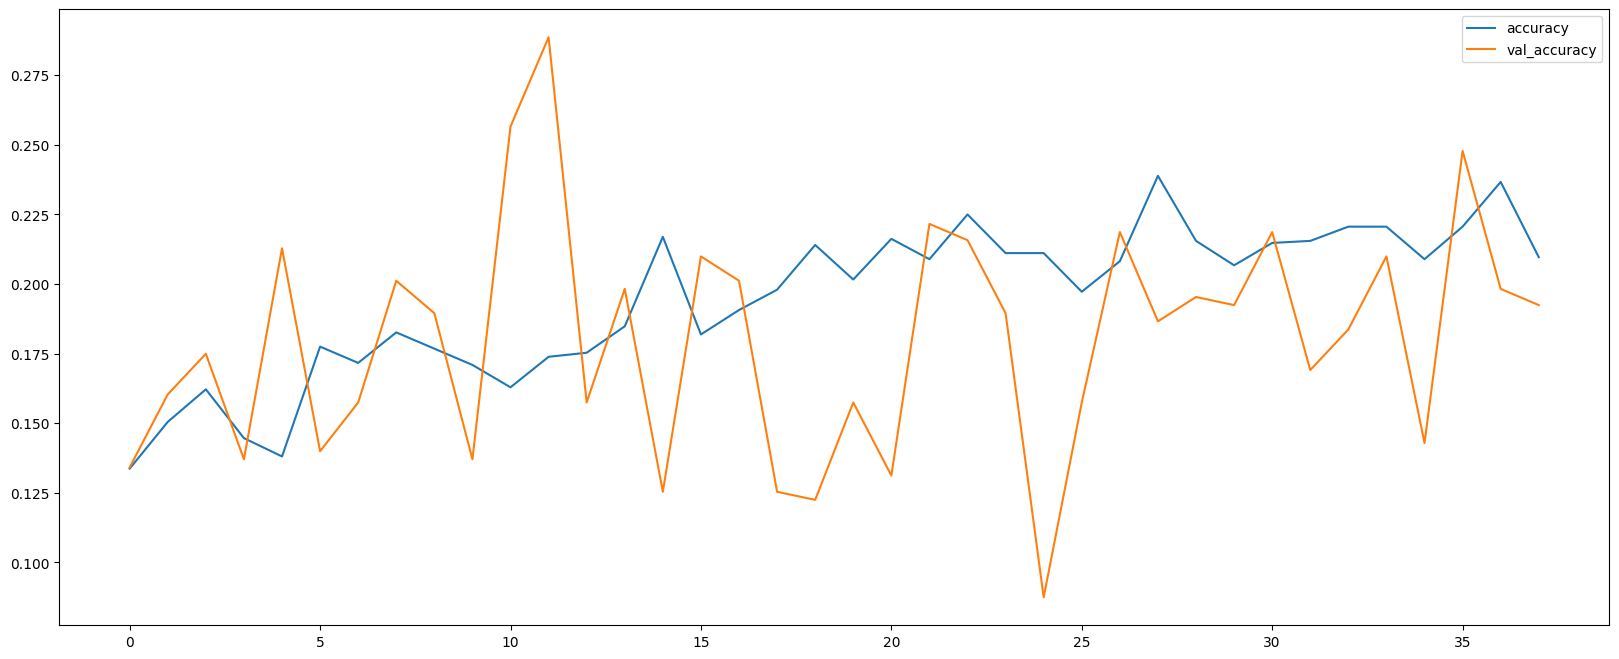

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
# plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
# plt.plot(history.history['categorical_crossentropy'])
# plt.plot(history.history['val_categorical_crossentropy'])
plt.legend(['accuracy','val_accuracy'])
# plt.legend(['loss' ,'accuracy' ,'val_loss' ,'val_accuracy', 'categorical_crossentropy', 'val_categorical_crossentropy'])

In [55]:
# Train SKlean Model

x_train,x_test,y_train,y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=9)

# Scikit learn model MLP
model=MLPClassifier(
    alpha=0.01, batch_size=8, epsilon=1e-08,random_state=1,
    hidden_layer_sizes=(120,100,80,50,30,20,), learning_rate='adaptive',
    max_iter=1500, verbose=0, n_iter_no_change=150
)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 29.29%


In [56]:
# Tuning Hyperparametrs

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model=MLPClassifier(
    batch_size='auto', epsilon=1e-08,random_state=1,learning_rate='adaptive',
    max_iter=100, verbose=0, n_iter_no_change=10
)
parameters = dict(
    alpha=[0.01, 0.001], hidden_layer_sizes=[(120,50,30,), (120,100,)]
)
clf = GridSearchCV(model, parameters)
clf.fit(x_train,y_train)


sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_alpha',
 'param_hidden_layer_sizes',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [57]:
clf.cv_results_

{'mean_fit_time': array([0.68504701, 0.40820861, 0.57354808, 0.44841123]),
 'std_fit_time': array([0.19205108, 0.03668993, 0.19095781, 0.11387626]),
 'mean_score_time': array([0.00203724, 0.00191364, 0.00297275, 0.00202332]),
 'std_score_time': array([0.00146914, 0.00066143, 0.00238464, 0.00122542]),
 'param_alpha': masked_array(data=[0.01, 0.01, 0.001, 0.001],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[(120, 50, 30), (120, 100), (120, 50, 30), (120, 100)],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.01, 'hidden_layer_sizes': (120, 50, 30)},
  {'alpha': 0.01, 'hidden_layer_sizes': (120, 100)},
  {'alpha': 0.001, 'hidden_layer_sizes': (120, 50, 30)},
  {'alpha': 0.001, 'hidden_layer_sizes': (120, 100)}],
 'split0_test_score': array([0.16618076, 0.16909621, 0.16618076, 0.2244898 ]),
 'split1_test_score':

In [58]:
clf.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (120, 50, 30)}

In [59]:
clf.best_score_

0.1886263277240721

In [60]:
clf.best_estimator_

MLPClassifier(alpha=0.001, hidden_layer_sizes=(120, 50, 30),
              learning_rate='adaptive', max_iter=100, random_state=1,
              verbose=0)

In [64]:
### Infernece from Notebook
!python ../src/engine.py --infer --infer-model-path ../output --infer-file-path '../input/Audio_Song_Actors_01-24/Actor_19/03-02-01-01-01-02-19.wav'
# !python ../src/engine.py --train --framework keras


Loading Model to infer on
(193,)
1/1 [==============================] - 0s 60ms/step
Predicted Emotion:  fearful


In [65]:
from tensorflow.keras.models import load_model
infer_file_path='../input/Audio_Song_Actors_01-24/Actor_19/03-02-01-01-01-02-19.wav'
infer_model_path = '../output'
framework = 'keras' # sklearn
mode='infer' # train


def load_infer_data(filepath):
    ''' 
    Function to load the infernece data from filepath and extract the features the same way we did for training.
    '''
    file_name=os.path.basename(filepath)
    feature=np.array(extract_feature(filepath))
    print(feature.shape)
    # printing the feature shape and reshaping it to a single row vector.
    return feature.reshape(1,-1)


In [67]:
if framework == 'keras':
    model = load_model(infer_model_path + '/keras')
    
else:
    with open(infer_model_path + '/sklearn_model.pkl', 'rb') as f:
        model = pickle.load(f)

In [68]:
model

In [69]:
data_x = load_infer_data(infer_file_path)

(193,)


In [70]:
predicted_emotion = model.predict(data_x)

1/1 [==============================] - 0s 29ms/step


In [71]:
predicted_emotion

array([[0.07769991, 0.15459828, 0.1604824 , 0.14919999, 0.14807262,
        0.16106807, 0.07126891, 0.07760978]], dtype=float32)

In [72]:
predicted_emotion_index = np.argmax(predicted_emotion)+1

In [73]:
predicted_emotion_index

6

In [74]:
print("Predicted Emotion: ", emotions_id['0'+str(predicted_emotion_index)])

Predicted Emotion:  fearful


In [75]:
emotions_id

{'01': 'neutral',
 '02': 'calm',
 '03': 'happy',
 '04': 'sad',
 '05': 'angry',
 '06': 'fearful',
 '07': 'disgust',
 '08': 'surprised'}